<a href="https://colab.research.google.com/github/Aomaphisara/bsc_dpdm22/blob/main/Classification_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

import matplotlib.pyplot as plt

In [2]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

8


<Figure size 432x288 with 0 Axes>

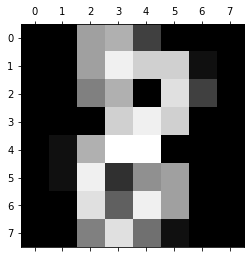

In [3]:
ind =28
plt.gray()
plt.matshow(digits.images[ind])
print(digits.target[ind])

# Quiz  3 march
- แบ่ง data ออกเป็น 80%(train)  20%(test) โดยใช้ random_state = 9
- หา parameters ที่ดีที่สุด (K (1,3,5) Distance_weighted (yes/no)) ด้วย 10-fold-cross-validation
- test parameters ที่ดีที่สุด กับ test data

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
X = digits['data']
y = digits['target']

In [6]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

# Load the digits dataset
digits = load_digits()

# Split the dataset into features (X) and target (y)
X = digits.data
y = digits.target

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Define the 10-fold cross-validation iterator
cv = KFold(n_splits=10, shuffle=True, random_state=5)

# Evaluate the classifier using 10-fold cross-validation
scores = cross_val_score(clf, X, y, cv=cv)

# Print the mean and standard deviation of the cross-validation scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.06)


#เฉลย


In [7]:
from sklearn.model_selection import train_test_split, cross_val_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

##model selection

In [10]:
# model 1 (K=1, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1weighted", scores.mean())

# model 2 (K=3, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3weighted", scores.mean())

# model 3 (K=5, weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K5weighted", scores.mean())

# model 4 (K=1, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=1, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K1NOweighted", scores.mean())

# model 5 (K=3, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=3, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: K3NOweighted", scores.mean())

# model 6 (K=5, no weighted)
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='uniform')
scores = cross_val_score(knn_distance, X_train, y_train, cv=10)
print("Mean Cross-Validation Score: KNOweighted", scores.mean())

Mean Cross-Validation Score: K1weighted 0.9881701631701633
Mean Cross-Validation Score: K3weighted 0.9860771173271171
Mean Cross-Validation Score: K5weighted 0.9826000388500388
Mean Cross-Validation Score: K1NOweighted 0.9881701631701633
Mean Cross-Validation Score: K3NOweighted 0.9860771173271171
Mean Cross-Validation Score: KNOweighted 0.9826000388500388


## Evaluate with test set

In [11]:
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_distance.fit(X_train,y_train)

y_pred = knn_distance.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

# Assume y_true and y_pred are the true and predicted labels, respectively
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy score: ", accuracy)


Accuracy score:  0.9833333333333333


#การบ้าน หาโมเดลที่ดีที่สุด จาก DT,NaiveBayes,KNN,ANN โดย เปรียบเทียบ อย่างละสอง parameter sets

In [13]:
from sklearn.model_selection import train_test_split  #การแบ่งข้อมูลเป็น train set 80% และ test set 20% 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    # X คือ feature และ y คือ target 

- จะใช้ 10-fold cross-validation เพื่อประเมินประสิทธิภาพของแต่ละโมเดล

##Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier     
from sklearn.model_selection import GridSearchCV   #GridSearchCV คือ การหาค่าที่ดีที่สุดของพารามิเตอร์ วิธีคือการกำหนดค่าของแต่ละพารามิเตอร์ที่เราต้องการจะหา 

# Define the parameter sets to test   กำหนดชุดพารามิเตอร์ที่จะทดสอบ
param_grid = {'max_depth': [3, 5],
              'min_samples_split': [2, 5]}

# Define the model   กำหนดโมเดล
dt = DecisionTreeClassifier(random_state=42)

# Define the grid search  #กำหนดและหา  GridSearchCV 
dt_cv = GridSearchCV(dt, param_grid, cv=10)

# Fit the grid search to the data #ปรับ grid ให้ค้นหาข้อมูล
dt_cv.fit(X_train, y_train)

# Print the best parameters and the corresponding score แสดงพารามิเตอร์ที่ดีที่สุดและคะแนนที่เกี่ยวข้อง
print("Best parameters: ", dt_cv.best_params_)
print("Best score: ", dt_cv.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 2}
Best score:  0.645066045066045


##Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

# Define the parameter sets to test   กำหนดชุดพารามิเตอร์ที่จะทดสอบ
param_grid = {}

# Define the model  กำหนดโมเดล
nb = GaussianNB()

# Define the grid search  กำหนดและหา  GridSearchCV 
nb_cv = GridSearchCV(nb, param_grid, cv=10)

# Fit the grid search to the data  # ปรับการค้นหา GridSearchCV ให้พอดีกับข้อมูล
nb_cv.fit(X_train, y_train)

# Print the best parameters and the corresponding score  แสดงพารามิเตอร์ที่ดีที่สุดและคะแนนที่เกี่ยวข้อง
print("Best parameters: ", nb_cv.best_params_)
print("Best score: ", nb_cv.best_score_)

Best parameters:  {}
Best score:  0.8295211732711734


##KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter sets to test   กำหนดชุดพารามิเตอร์ที่จะทดสอบ
param_grid = {'n_neighbors': [1, 3],
              'weights': ['uniform', 'distance']}

# Define the model กำหนดโมเดล
knn = KNeighborsClassifier()

# Define the grid search  กำหนดและหา  GridSearchCV 
knn_cv = GridSearchCV(knn, param_grid, cv=10)

# Fit the grid search to the data ปรับการค้นหา GridSearchCV ให้พอดีกับข้อมูล
knn_cv.fit(X_train, y_train)

# Print the best parameters and the corresponding score  แสดงพารามิเตอร์ที่ดีที่สุดและคะแนนที่เกี่ยวข้อง
print("Best parameters: ", knn_cv.best_params_)
print("Best score: ", knn_cv.best_score_)

Best parameters:  {'n_neighbors': 1, 'weights': 'uniform'}
Best score:  0.9881604506604506


##ANN

In [17]:
from sklearn.naive_bayes import GaussianNB

# Define the parameter sets to test   กำหนดชุดพารามิเตอร์ที่จะทดสอบ
param_grid = {}

# Define the model  กำหนดโมเดล
nb = GaussianNB()

# Define the grid search  กำหนดและหา  GridSearchCV 
nb_cv = GridSearchCV(nb, param_grid, cv=10)

# Fit the grid search to the data  # ปรับการค้นหา GridSearchCV ให้พอดีกับข้อมูล
nb_cv.fit(X_train, y_train)

# Print the best parameters and the corresponding score  แสดงพารามิเตอร์ที่ดีที่สุดและคะแนนที่เกี่ยวข้อง
print("Best parameters: ", nb_cv.best_params_)
print("Best score: ", nb_cv.best_score_)

Best parameters:  {}
Best score:  0.8295211732711734


 ตอบ โมเดลที่ดีที่สุด คือ KNN มีค่าเท่ากับ 0.9881604506604506